# ITERATIVE PRISONER'S DILEMMA 
Kosiakov Arina, Targa Pietro, Zuccolo Giada


## Description of the problem

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

The aim of the project is to analyse the different behaviour of the prisoners in a simple tournament and in a more complex tournament, which can be seen as a natural selection between different genes.

## Definition of the strategies

In the Prisoner's Dilemma different strategies can be adopted. In this project five different strategies were taken into the analysis: 

* **Nice guy**: always cooperate
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move 

These strategies represent the *gene* of the prisoner and will be later used to analyse the behaviour of the different *populations*.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

In [31]:
#Definition of the different strategies, also referred to as genes

def nicePlayer(k,n):
    return np.array([[1,0] for i in range(n)])  


def badPlayer(k,n):
    return np.array([[0,1] for i in range(n)]) 


def mainlyNicePlayer(k,n):                                           
    def fun():
        if (np.random.choice(['Nice','Bad'], p=[k, 1-k])=='Nice'):
            return np.array([1,0])
        else:
            return np.array([0,1])

    return np.array([fun() for i in range(n)])


def mainlyBadPlayer(k,n):
    def fun():
        if(np.random.choice(['Nice','Bad'], p=[1-k, k])=='Bad'):
            return np.array([0,1])
        else:
            return np.array([1,0])

    return np.array([fun() for i in range(n)])
    
    
# TFT player returns an empty array, because it is going to be populated with past 
# values of the other player/prisoner
def tftPlayer(k,n):   
    return np.array([]) 
    

## Definition of the **Prisoner()** class
A **Prisoner()** class is created in order to track the evolution of the prisoners' behaviour. This class describes the prisoner and presents different methods to obtain the information about the gene, and about the payoff. The payoff is the score of a single prisoner after a certain amount of matches.

In [32]:
class Prisoner():

    payoff = 0        # store the total payoff after n matches
    gene = ''         # one of the strategies previously described 
    k = 0             # k parameter used to compute the probability of the "mainly" players

    def __init__(self, x, k): #initiate the prisoners, assigning the gene and the k factor
        self.gene = x
        self.k = k

    def getGene(self):
        return self.gene

    def setGene(self, g):
        self.gene = g

    def moves(self,n):                  # calls the gene function to generate an array of n moves
        return self.gene(self.k,n)
    
    def addPayoff(self,x):
        self.payoff += x

    def setPayoff(self,x):
        self.payoff = x
    
    def getPayoff(self):
        return self.payoff

## Simple IPD
In this section is presented the code used to perform the simple iterated Prisoner's Dilemma (IPD). The idea is to create a tournament of *n* matches and to analyse the performance of the different strategies. In particular, the attention is focused on three cases:
* **Nice guy** vs **Bad guy**
* **Mainly nice** vs **Tit-for-tat**
* **Mainly bad** vs **Tit-for-tat**

It is also possible to analyse all the other configurations, but the outcome is trivial and not interesting.

In [33]:
def compute(player1,player2,M,n, verbose = False, get_pays= False):     # generates n moves for the two players (self and opponent) and computes payoffs
        p1 = player1.moves(n)
        p2 = player2.moves(n)

        if (not p1.any() and not p2.any()):                 # checks if one or both player are tft, and generate their moves
            p1 = np.array([[1,0] for i in range(n)])
            p2 = p1
        elif not p1.any():
            p1 = np.concatenate((np.array([[1,0]]),p2[:-1,:]))
        elif not p2.any():
            p2 = np.concatenate((np.array([[1,0]]),p1[:-1,:]))

        if get_pays:                                        # saves the payoffs of each player as an array to return them if get_pays is set True
            pays1 = []
            pays2 = []

        for i in range(n):
            pay1 = np.dot(p1[i,:], np.dot(M, np.transpose(p2[i,:])))
            pay2 = np.dot(p2[i,:], np.dot(M, np.transpose(p1[i,:])))

            if get_pays:
                pays1.append(pay1)
                pays2.append(pay2)

            if verbose: print('Round', i, 'moves:', p1[i,:], p2[i,:], 'pays', pay1,pay2)  # if True prints what happens each round

            player1.addPayoff(pay1)
            player2.addPayoff(pay2)

        if get_pays: return np.array(pays1), np.array(pays2)


The code presented below is a test simulation. The number of matches is set to 15, $k$ is set to $0.75$ and the payoff matrix is defined with the following parameters: $r = 3, s = 0, t = 5, p = 2$.
 The payoff matrix and the number of matches are going to be constant in the whole analysis. For this reason they are initialized in this section.

In [47]:
M = [[3, 0],
    [5,2]]

k = 0.75
n = 15

genes = [nicePlayer, badPlayer, mainlyNicePlayer, mainlyBadPlayer, tftPlayer] # the functions above

nice_pl = Prisoner(genes[0],k)
bad_pl = Prisoner(genes[1],k)
m_nice_pl = Prisoner(genes[2],k)
m_bad_pl = Prisoner(genes[3],k)
tft_pl = Prisoner(genes[4],k)

In [46]:
### NICE VS BAD ###
print("##### Nice guy vs Bad guy #####")
n_vs_b = compute(nice_pl,bad_pl,M,n, verbose = True, get_pays= True)
print("Nice guy total payoff: ", nice_pl.getPayoff())
print("Bad guy total payoff: ", bad_pl.getPayoff())

##### Nice guy vs Bad guy #####
Round 0 moves: [1 0] [0 1] pays 0 5
Round 1 moves: [1 0] [0 1] pays 0 5
Round 2 moves: [1 0] [0 1] pays 0 5
Round 3 moves: [1 0] [0 1] pays 0 5
Round 4 moves: [1 0] [0 1] pays 0 5
Round 5 moves: [1 0] [0 1] pays 0 5
Round 6 moves: [1 0] [0 1] pays 0 5
Round 7 moves: [1 0] [0 1] pays 0 5
Round 8 moves: [1 0] [0 1] pays 0 5
Round 9 moves: [1 0] [0 1] pays 0 5
Round 10 moves: [1 0] [0 1] pays 0 5
Round 11 moves: [1 0] [0 1] pays 0 5
Round 12 moves: [1 0] [0 1] pays 0 5
Round 13 moves: [1 0] [0 1] pays 0 5
Round 14 moves: [1 0] [0 1] pays 0 5
Nice guy total payoff:  0
Bad guy total payoff:  150


In [44]:
### MAINLY NICE VS TFT ###
print("\n##### Mainly nice guy vs tft #####")
n_vs_b = compute(m_nice_pl,tft_pl,M,n, verbose = True, get_pays= True)
print("Mainly nice guy total payoff: ", m_nice_pl.getPayoff())
print("Tft total payoff: ", tft_pl.getPayoff())


##### Mainly nice guy vs tft #####
Round 0 moves: [1 0] [1 0] pays 3 3
Round 1 moves: [0 1] [1 0] pays 5 0
Round 2 moves: [1 0] [0 1] pays 0 5
Round 3 moves: [1 0] [1 0] pays 3 3
Round 4 moves: [0 1] [1 0] pays 5 0
Round 5 moves: [1 0] [0 1] pays 0 5
Round 6 moves: [0 1] [1 0] pays 5 0
Round 7 moves: [1 0] [0 1] pays 0 5
Round 8 moves: [1 0] [1 0] pays 3 3
Round 9 moves: [0 1] [1 0] pays 5 0
Round 10 moves: [1 0] [0 1] pays 0 5
Round 11 moves: [1 0] [1 0] pays 3 3
Round 12 moves: [0 1] [1 0] pays 5 0
Round 13 moves: [0 1] [0 1] pays 2 2
Round 14 moves: [1 0] [0 1] pays 0 5
Mainly nice guy total payoff:  39
Tft total payoff:  39


In [45]:
### MAINLY BAD VS TFT ###
print("\n##### Mainly bad guy vs tft #####")
n_vs_b = compute(m_bad_pl,tft_pl,M,n, verbose = True, get_pays= True)
print("Mainly bad guy total payoff: ", m_bad_pl.getPayoff())
print("Tft total payoff: ", tft_pl.getPayoff())


##### Mainly bad guy vs tft #####
Round 0 moves: [1 0] [1 0] pays 3 3
Round 1 moves: [0 1] [1 0] pays 5 0
Round 2 moves: [0 1] [0 1] pays 2 2
Round 3 moves: [0 1] [0 1] pays 2 2
Round 4 moves: [1 0] [0 1] pays 0 5
Round 5 moves: [0 1] [1 0] pays 5 0
Round 6 moves: [1 0] [0 1] pays 0 5
Round 7 moves: [0 1] [1 0] pays 5 0
Round 8 moves: [1 0] [0 1] pays 0 5
Round 9 moves: [0 1] [1 0] pays 5 0
Round 10 moves: [0 1] [0 1] pays 2 2
Round 11 moves: [0 1] [0 1] pays 2 2
Round 12 moves: [0 1] [0 1] pays 2 2
Round 13 moves: [1 0] [0 1] pays 0 5
Round 14 moves: [0 1] [1 0] pays 5 0
Mainly bad guy total payoff:  38
Tft total payoff:  72


It is possible to observe that:
* in the first case the bad guy always wins
* in the second case tft wins whenever the mainly nice guy acts as a bad guy, otherwise the game ends with a draw
* in the last case tft always wins, because it penilizes the bad actions

## Multiple players IPD (MPIPD)



In this section the number of players for each gene is increased to form a population. The different populations play against each other in a round robin scheme. In order to perform the tournament the **iteratedMatch()** class is created.


In [54]:
s = 100
def dfSetup():
    columns = ['Nice', 'Bad', 'Mainly Nice', 'Mainly Bad', 'Tit for Tat']
    tuples = list(combinations_with_replacement(columns, 2))
    multi_index = pd.MultiIndex.from_tuples(tuples, names=['PlayerA', 'PlayerB'])
    df = pd.DataFrame(pd.Series(index=multi_index))
    df = df.iloc[: , :-1]              #drops last column ( era una colonna di NaN con index 0 bho)
    return df

def tot_pay(player1,player2,M,s):
    res1, res2 = compute(player1,player2, M, s, get_pays=True)
    return (round(np.sum(res1)/s,2), round(np.sum(res2)/s,2))


df = dfSetup()

genes = [nicePlayer, badPlayer, mainlyNicePlayer, mainlyBadPlayer, tftPlayer]
tuples = list(combinations_with_replacement(genes, 2))

res = [tot_pay(Prisoner(x[0],k),Prisoner(x[1],k),M,s) for x in tuples]

df['Medium Payoff (PlayerA, PlayerB)'] = res
df

C:\Users\arina\AppData\Local\Temp\ipykernel_31128\3319869340.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.DataFrame(pd.Series(index=multi_index))


Medium Payoff (PlayerA, PlayerB)
PlayerA     PlayerB                                     
Nice        Nice                              (3.0, 3.0)
            Bad                               (0.0, 5.0)
            Mainly Nice                     (2.28, 3.48)
            Mainly Bad                      (0.78, 4.48)
            Tit for Tat                       (3.0, 3.0)
Bad         Bad                               (2.0, 2.0)
            Mainly Nice                     (4.28, 0.48)
            Mainly Bad                      (2.72, 1.52)
            Tit for Tat                     (2.03, 1.98)
Mainly Nice Mainly Nice                     (2.58, 2.83)
            Mainly Bad                      (1.33, 3.63)
            Tit for Tat                     (2.76, 2.76)
Mainly Bad  Mainly Bad                      (2.12, 2.42)
            Tit for Tat                     (2.25, 2.25)
Tit for Tat Tit for Tat                       (3.0, 3.0)

As expected the results mirror the ones from the previous analysis.

## Repeated MPIPD
The following section presents the problem of the MPIPD. In this problem the different populations increase based on the results that each strategy achieved in the previous iteration. The main idea is to create bigger populations, make random couples  of prisoners play for a number of matches before changing the generation. When the generation change happens the number of members in the new generation is computed and used to actually generate the new population. 

In [7]:
# Compute the p array, that determines the number of the members of each population in the next generation
def nextGen(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, genes, k, total):

    def getFactor(x):

        if np.any(x):
            return np.sum([x[i].getPayoff() for i in range(len(x))])
        else:
            return 0

    #p array normalized total payoffs of the considered populations
    p = np.array(list(map(getFactor, [nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop])))
    #print('Total payoff per gene',p)

    p = p/np.sum(p) #normalization of the p array
    return Populate(p,total, genes, k)



# Generates new populations according to the p vector
def Populate(p,total, genes, k):

    nice_pop = np.array([Prisoner(genes[0],k) for i in range(int(np.floor(p[0]*total)))])
    bad_pop = np.array([Prisoner(genes[1],k) for i in range(int(np.floor(p[1]*total)))])
    m_nice_pop = np.array([Prisoner(genes[2],k) for i in range(int(np.floor(p[2]*total)))])
    m_bad_pop = np.array([Prisoner(genes[3],k) for i in range(int(np.floor(p[3]*total)))])
    tft_pop = np.array([Prisoner(genes[4],k) for i in range(int(total-(len(nice_pop)+len(bad_pop)+len(m_nice_pop)+len(m_bad_pop))))])

    print('Current populatons: ',len(nice_pop),len(bad_pop),len(m_nice_pop),len(m_bad_pop),len(tft_pop))

    return nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop


# Starts the game process  
def Start(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop,M,max_gen,n_matches,genes,k,total):

    nice_pop_evol = [len(nice_pop)]
    bad_pop_evol = [len(bad_pop)]
    m_nice_pop_evol = [len(m_nice_pop)]
    m_bad_pop_evol = [len(m_bad_pop)]
    tft_pop_evol = [len(tft_pop)]

    for i in range(max_gen):
        pop = np.concatenate([nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop])
        np.random.shuffle(pop)
        curr = np.reshape(pop,(int(len(pop)/2),2)) #random couples of prisoners

        for row in curr:
            compute(row[0], row[1],M,n_matches) #updates the payoffs of each prisoner

        #change of the generation after n_matches
        nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop = nextGen(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop,genes,k,total)
        nice_pop_evol.append(len(nice_pop))
        bad_pop_evol.append(len(bad_pop))
        m_nice_pop_evol.append(len(m_nice_pop))
        m_bad_pop_evol.append(len(m_bad_pop))
        tft_pop_evol.append(len(tft_pop))
        
        #Breaks if only one population remains
        if (len(nice_pop)==total or len(bad_pop)==total or len(m_nice_pop)==total or len(m_bad_pop)==total or len(tft_pop)==total): break

    return np.array(nice_pop_evol), np.array(bad_pop_evol), np.array(m_nice_pop_evol), np.array(m_bad_pop_evol), np.array(tft_pop_evol) 

### Demo of the MPIPD

Current populatons:  200 200 200 200 200
Current populatons:  147 260 168 220 205
Current populatons:  109 302 143 233 213
Current populatons:  67 350 119 244 220
Current populatons:  40 416 74 238 232
Current populatons:  18 457 46 227 252
Current populatons:  9 478 29 210 274
Current populatons:  4 500 14 187 295
Current populatons:  1 502 10 161 326
Current populatons:  0 503 7 138 352
Current populatons:  0 493 4 119 384
Current populatons:  0 481 1 100 418
Current populatons:  0 461 1 84 454
Current populatons:  0 427 1 70 502
Current populatons:  0 391 1 58 550
Current populatons:  0 350 1 49 600
Current populatons:  0 304 1 41 654
Current populatons:  0 256 0 35 709
Current populatons:  0 210 0 28 762
Current populatons:  0 166 0 24 810
Current populatons:  0 128 0 19 853
Current populatons:  0 97 0 14 889
Current populatons:  0 71 0 10 919
Current populatons:  0 51 0 8 941
Current populatons:  0 36 0 5 959
Current populatons:  0 25 0 3 972
Current populatons:  0 17 0 2 981
Curr

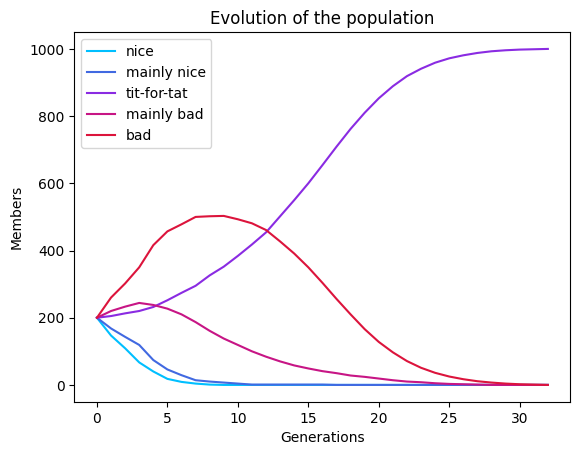

In [56]:
n_prisoners = 1000 #total number of prisoners
init = [0.2,0.2,0.2,0.2,0.2] #initialization of the p vector (see nextGen())

rounds = 100
matches = 50

nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop = Populate(init,n_prisoners,genes,k)

nice_pop_evol, bad_pop_evol, m_nice_pop_evol, m_bad_pop_evol, tft_pop_evol = Start(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop,M,rounds,matches,genes,k,n_prisoners)

fig = plt.figure()
plt.plot(np.arange(len(nice_pop_evol)),nice_pop_evol, label='nice', c = "deepskyblue")
plt.plot(np.arange(len(nice_pop_evol)),m_nice_pop_evol, label='mainly nice', c = "royalblue")
plt.plot(np.arange(len(nice_pop_evol)),tft_pop_evol, label='tit-for-tat', c = "blueviolet")
plt.plot(np.arange(len(nice_pop_evol)),m_bad_pop_evol, label='mainly bad', c = "mediumvioletred")
plt.plot(np.arange(len(nice_pop_evol)),bad_pop_evol, label='bad', c = "crimson")

plt.legend(loc='best')
plt.title('Evolution of the population')
plt.xlabel('Generations')
plt.ylabel('Members')
plt.show()

It is possible to notice that the population of the tft is the one that survives. This is an expected outcome for the following reasons:
* The population of the bad guys most likely destroys all the population of nice guys, same happens to the mainly nice population
* The mainly bad remains alive till there are the nice and mainly nice populations, but as soon as they are gone, it loses to the bad population. In fact, mainly bad guys can sometimes behave as nice, which makes them weaker with respect to the bad guys
* Tft wins because it is the only strategy that can penilize the bad guys

## rMPIPD with gene mutations

In this last section it is reported the problem of the mutating MPIPD. This problem consists in the analysis of the different populations when a random mutation occurs. The main idea is to use this random mutation in order to change the prisoner's strategy. The final aim is to observe which strategies survive and what are the differences with respect to the previous situations. 

In [17]:
 # h parameter sets the probability of a prisoner to change strategy
def nextGenMutating(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, genes, k, h, total):

    def getFactor(x):
        if np.any(x):
            return np.sum([x[i].getPayoff() for i in range(len(x))])
        else:
            return 0

    p = np.array(list(map(getFactor, [nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop])))
    p = p/np.sum(p)
    return PopulateMutating(p,total, genes, k, h)



def PopulateMutating(p,total, genes, k, h):

    nice_pop = np.array([Prisoner(genes[0],k) for i in range(int(np.floor(p[0]*total)))])
    bad_pop = np.array([Prisoner(genes[1],k) for i in range(int(np.floor(p[1]*total)))])
    m_nice_pop = np.array([Prisoner(genes[2],k) for i in range(int(np.floor(p[2]*total)))])
    m_bad_pop = np.array([Prisoner(genes[3],k) for i in range(int(np.floor(p[3]*total)))])
    tft_pop = np.array([Prisoner(genes[4],k) for i in range(int(total-(len(nice_pop)+len(bad_pop)+len(m_nice_pop)+len(m_bad_pop))))])

    print('Current populatons before mutation: ',len(nice_pop),len(bad_pop),len(m_nice_pop),len(m_bad_pop),len(tft_pop))

    pop = [nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop] #population before mutation
    
    mutating_nice = []
    mutating_bad = []
    mutating_m_nice = []
    mutating_m_bad = []
    mutating_tft = []

    idx_mutations = [mutating_nice, mutating_bad, mutating_m_nice, mutating_m_bad, mutating_tft]
    pay_mutations = []

    for l in range(len(pop)):
        for u in range(len(pop[l])):
            if (np.random.choice(['Mutate','Not Mutate'], p=[h, 1-h])=='Mutate'):
                idx_mutations[l] = np.append(idx_mutations[l],u) #saves the index of the prisoner that decided to mutate
                pay_mutations = np.append(pay_mutations, pop[l][u].getPayoff())

    #delete the prisoner that mutated from the original population
    for i in range(len(pop)):
        idxs = [int(x) for x in idx_mutations[i]] # cast to int requested by np.delete()
        pop[i] = np.delete(pop[i], idxs)


    missing_prisoners = total - (len(pop[0])+len(pop[1])+len(pop[2])+len(pop[3])+len(pop[4]))
    print('Mutated prisoners: ', missing_prisoners)
    
    mutated_genes = np.random.randint(0,5, missing_prisoners) # choose new random genes for the mutated prisoners

    #add the mutated prisoner to the right new population
    for i in range(missing_prisoners):
        new_prisoner = Prisoner(genes[mutated_genes[i]],k)
        new_prisoner.setPayoff(pay_mutations[i]) # keep track of the payoff of the mutated prisoner, so it is not set to 0
        pop[mutated_genes[i]] = np.append(pop[mutated_genes[i]], new_prisoner) 

    
    print('Current populatons after mutating: ',len(pop[0]),len(pop[1]),len(pop[2]),len(pop[3]),len(pop[4]))
                
    return pop[0],pop[1],pop[2],pop[3],pop[4]



def StartMutating(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, M, rounds, matches, genes, k, h, total):

    nice_pop_evol = []
    bad_pop_evol = []
    m_nice_pop_evol = []
    m_bad_pop_evol = []
    tft_pop_evol = []

    for i in range(rounds):
        pop = np.concatenate([nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop])
        np.random.shuffle(pop)
        curr = np.reshape(pop,(int(len(pop)/2),2))

        for row in curr:
            compute(row[0], row[1],M,matches)

        nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop = nextGenMutating(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, genes, k, h,total)
        nice_pop_evol.append(len(nice_pop))
        bad_pop_evol.append(len(bad_pop))
        m_nice_pop_evol.append(len(m_nice_pop))
        m_bad_pop_evol.append(len(m_bad_pop))
        tft_pop_evol.append(len(tft_pop))
        
        
        if (len(nice_pop)==total or len(bad_pop)==total or len(m_nice_pop)==total or len(m_bad_pop)==total or len(tft_pop)==total): break


    return np.array(nice_pop_evol), np.array(bad_pop_evol), np.array(m_nice_pop_evol), np.array(m_bad_pop_evol), np.array(tft_pop_evol) 


### Demo

Current populatons:  200 200 200 200 200
Current populatons before mutation:  155 245 168 229 203
Mutated prisoners:  8
Current populatons after mutating:  157 244 167 228 204
Current populatons before mutation:  101 312 137 241 209
Mutated prisoners:  10
Current populatons after mutating:  102 311 136 241 210
Current populatons before mutation:  61 374 105 243 217
Mutated prisoners:  14
Current populatons after mutating:  62 369 110 243 216
Current populatons before mutation:  29 429 74 239 229
Mutated prisoners:  11
Current populatons after mutating:  34 426 74 238 228
Current populatons before mutation:  20 461 56 222 241
Mutated prisoners:  6
Current populatons after mutating:  21 457 57 224 241
Current populatons before mutation:  6 489 40 211 254
Mutated prisoners:  13
Current populatons after mutating:  7 486 43 210 254
Current populatons before mutation:  6 514 23 184 273
Mutated prisoners:  7
Current populatons after mutating:  8 509 25 185 273
Current populatons before mutati

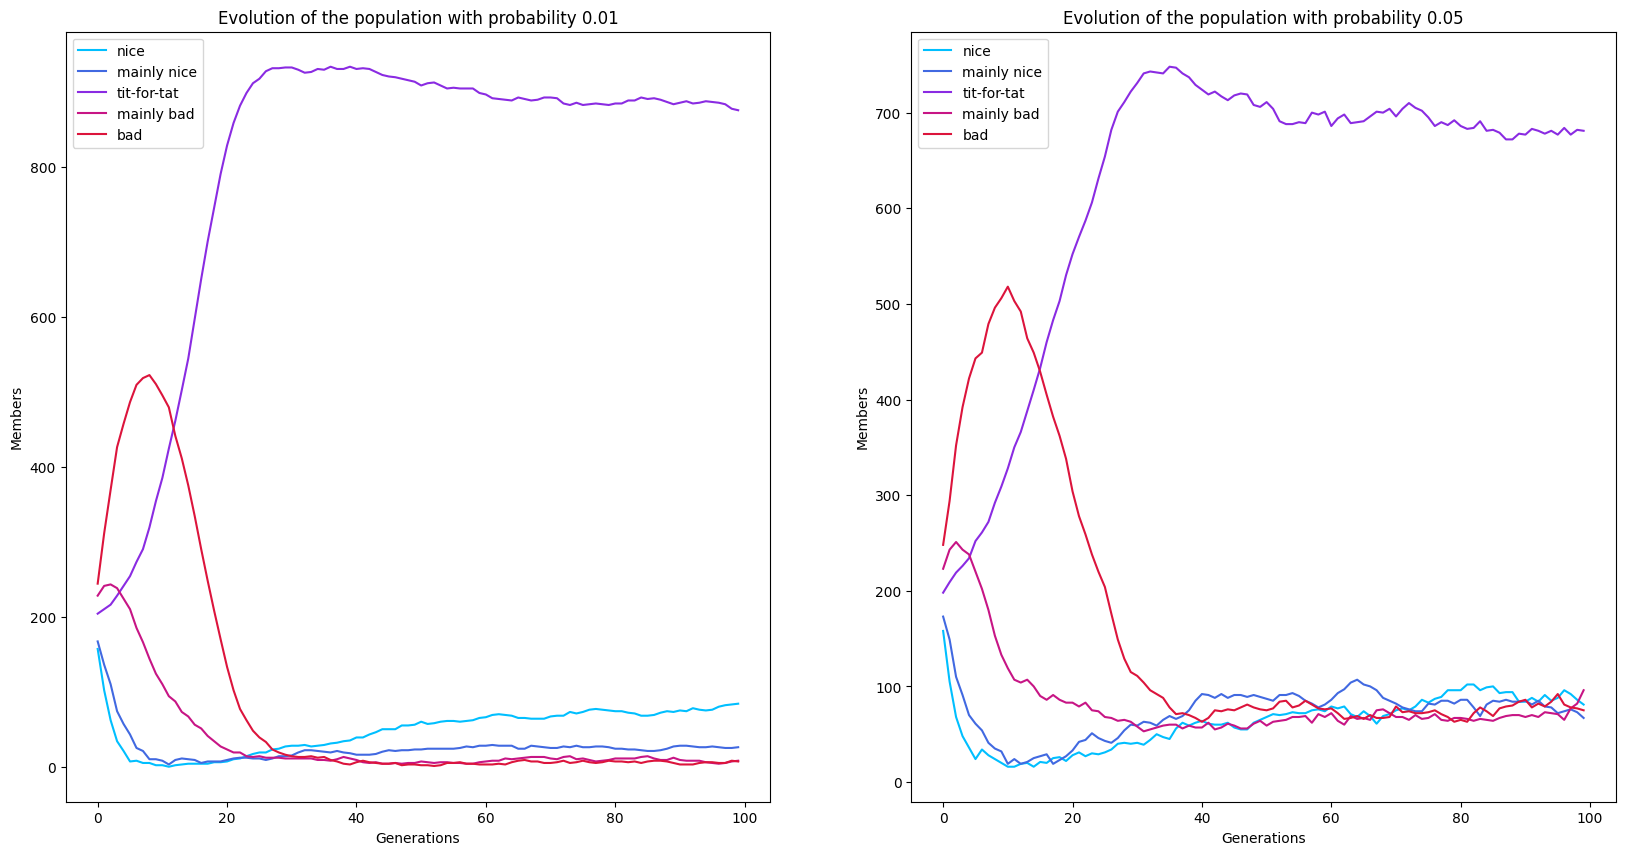

In [57]:
h = 0.01
h1 = 0.05


tot = 1000

nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop = Populate([0.2,0.2,0.2,0.2,0.2],tot,genes,k)

rounds = 100
matches = 50

nice_pop_evol, bad_pop_evol, m_nice_pop_evol, m_bad_pop_evol, tft_pop_evol = StartMutating(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, M, rounds, matches, genes, k, h, tot)
nice_pop_evol1, bad_pop_evol1, m_nice_pop_evol1, m_bad_pop_evol1, tft_pop_evol1 = StartMutating(nice_pop, bad_pop, m_nice_pop, m_bad_pop, tft_pop, M, rounds, matches, genes, k, h1, tot)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize = (20,10))
ax1.plot(np.arange(len(nice_pop_evol)),nice_pop_evol, label='nice', c = "deepskyblue")
ax1.plot(np.arange(len(nice_pop_evol)),m_nice_pop_evol, label='mainly nice', c = "royalblue")
ax1.plot(np.arange(len(nice_pop_evol)),tft_pop_evol, label='tit-for-tat',c = "blueviolet")
ax1.plot(np.arange(len(nice_pop_evol)),m_bad_pop_evol, label='mainly bad', c = "mediumvioletred")
ax1.plot(np.arange(len(nice_pop_evol)),bad_pop_evol, label='bad', c = "crimson")
ax1.legend(loc='best')
ax1.set_title('Evolution of the population with probability %.2f' %h)
ax1.set_xlabel('Generations')
ax1.set_ylabel('Members')


ax2.plot(np.arange(len(nice_pop_evol1)),nice_pop_evol1, label='nice',c = "deepskyblue")
ax2.plot(np.arange(len(nice_pop_evol1)),m_nice_pop_evol1, label='mainly nice', c = "royalblue")
ax2.plot(np.arange(len(nice_pop_evol1)),tft_pop_evol1, label='tit-for-tat', c = "blueviolet")
ax2.plot(np.arange(len(nice_pop_evol1)),m_bad_pop_evol1, label='mainly bad', c = "mediumvioletred")
ax2.plot(np.arange(len(nice_pop_evol1)),bad_pop_evol1, label='bad', c = "crimson")
ax2.legend(loc='best')
ax2.set_title('Evolution of the population with probability %.2f' %h1)
ax2.set_xlabel('Generations')
ax2.set_ylabel('Members')
plt.show()

These graphs shows that the population that survives after mutations is the tft one, as expected. It is also possible to notice that the nice population starts growing slowly and this happens due to the fact that there are no bad guys and while playing against tft they don't get penalized. In fact as it was previously stated the matches between nice guys and tft can lead only to the lose of nice guys or draw.